In [1]:
#import stuff
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import shap as sp
import copy
from sklearn.neural_network import MLPClassifier as nn

In [2]:
# get data sets
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
adults = pd.read_csv('data/adult.data', header = None,  skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
            'capital-loss', 'hours/week', 'native-country', 'income'
            ]
)
pokemon = pd.read_csv('data/pokemon.csv', header = None, 
                     skiprows=1, encoding = 'latin-1', low_memory = False,
                    names = ['Name', 'Version', 'Primary Type' ,'Secondary Type', 'Stage' ,'Attack', 'Defense' , 'HP', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total', 'Legendary'])


,Name,Version,Primary Type,Secondary Type,Stage,Attack,Defense,HP,Sp. Attack,Sp. Defense,Speed,Total,Legendary
0,Bulbasaur,NaN,GRASS,POISON,1,49,49,45,65,65,45,318,N
1,Ivysaur,NaN,GRASS,POISON,2,62,63,60,80,80,60,405,N
2,Venusaur,NaN,GRASS,POISON,3,82,83,80,100,100,80,525,N
3,Venusaur,Mega Venusaur,GRASS,POISON,3,100,123,80,122,120,80,625,N
4,Charmander,NaN,FIRE,NaN,1,52,43,39,60,50,65,309,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,NaN,ICE,NaN,1,145,130,100,65,110,30,580,Y
1041,Spectrier,NaN,GHOST,NaN,1,65,60,100,145,80,130,580,Y
1042,Calyrex,NaN,PSYCHIC,GRASS,1,80,80,100,80,80,80,500,Y
1043,Calyrex,Ice Rider,PSYCHIC,ICE,2,165,150,100,85,130,50,680,Y


# Iris Section

## Versicolor vs Virginica

In [3]:
#divide sets function
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    return (list1,list2)

In [4]:
# train the set using a Neural Network
sv = iris[(iris['class'] == 'Iris-versicolor') | (iris['class'] == 'Iris-virginica')]

#training values
xs = sv[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:70].values
ys = sv['class'][:70]

#testing values
testX = sv[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][70:].values
testY = sv['class'][70:]
ys = ys.replace(['Iris-versicolor', 'Iris-virginica'], [0,1]).values

mlp = nn(max_iter=50000)

mlp.fit(xs, ys)
explainer = sp.Explainer(mlp.predict, xs, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # pass in the predict method and the data to use
shap_values = explainer(xs)

In [5]:
# predict random values
pred = mlp.predict(testX)
print(pred)
shap_values[1]

[1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


.values =
array([-0.01904762, -0.02619048, -0.16666667, -0.07380952])

.base_values =
0.2857142857142857

.data =
array([6.4, 3.2, 4.5, 1.5])

In [6]:
# find weight matrices
[coef.shape for coef in mlp.coefs_] # no idea what this means or if it is significant or not

[(4, 100), (100, 1)]

In [7]:
rand = [[4.5 , 1.3, 3.2, 5.4]]
pred = mlp.predict_proba(rand)
print(f'The prediction of {rand} is ~> {pred}\nThis means that there is {round(pred[0][0] * 100, 5)}% chance of being a Versicolor, and a {round(pred[0][1] * 100, 5)}% of being a Virginica ')

The prediction of [[4.5, 1.3, 3.2, 5.4]] is ~> [[2.28358900e-08 9.99999977e-01]]
This means that there is 0.0% chance of being a Versicolor, and a 100.0% of being a Virginica 


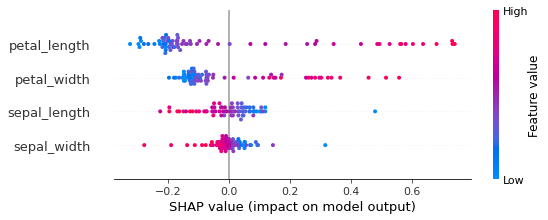

In [8]:
sp.summary_plot(shap_values)

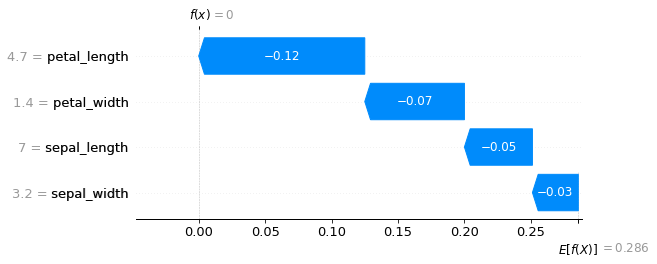

In [9]:
sp.plots.waterfall(shap_values[0])

In [10]:
sp.initjs()
sp.plots.force(shap_values)

## Info Gathered

Petal legnth has the largest say in deteremining a flower class, but the other features still have some pull. This is displayed by the SHAP values above.

# Setosa - Virginica

In [11]:
#training values
sv = iris[(iris['class'] == 'Iris-setosa') | (iris['class'] == 'Iris-virginica')]

xs = sv[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:70].values
ys = sv['class'][:70]

#testing values
testX = sv[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][70:].values
testY = sv['class'][70:]
ys = ys.replace(['Iris-setosa', 'Iris-virginica'], [0,1]).values

mlp = nn(max_iter=50000)

mlp.fit(xs, ys)
explainer = sp.Explainer(mlp.predict, xs, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # pass in the predict method and the data to use
shap_values = explainer(xs)

In [12]:
# predict random values
pred = mlp.predict(testX)
print(pred)
shap_values[1]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


.values =
array([ 0.        ,  0.        , -0.28571429,  0.        ])

.base_values =
0.2857142857142857

.data =
array([4.9, 3. , 1.4, 0.2])

In [13]:
rand = [[4.5 , 1.3, 3.2, 5.4]]
pred = mlp.predict_proba(rand)
print(f'The prediction of {rand} is ~> {pred}\nThis means that there is {round(pred[0][0] * 100, 5)}% chance of being a Setosa, and a {round(pred[0][1] * 100, 5)}% of being a Virginica ')

The prediction of [[4.5, 1.3, 3.2, 5.4]] is ~> [[0.00178319 0.99821681]]
This means that there is 0.17832% chance of being a Setosa, and a 99.82168% of being a Virginica 


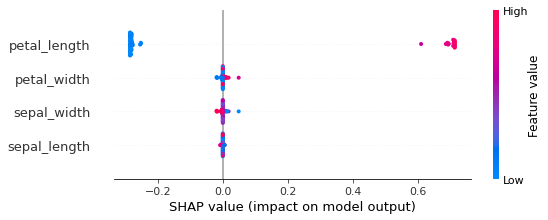

In [14]:
sp.summary_plot(shap_values)

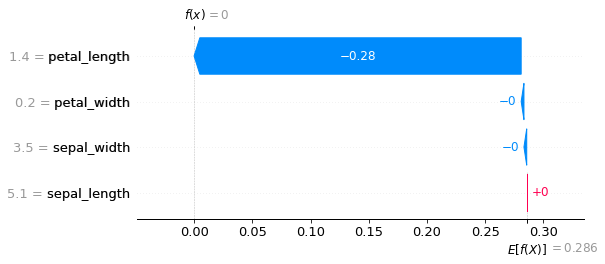

In [15]:
sp.plots.waterfall(shap_values[0])

In [16]:
sp.initjs()
sp.plots.force(shap_values)

## Info Gathered

Petal Length overwhelmingly dominates the field when determining if a flower is setosa or virginica. This isn't shocking considering the massive difference between the two petal lengths. 

# Adult Set;

We will be testing a variety of different features using the adults set. Different features used will include:

- Age
- Occupation
- Sex
- Capital Gain/Loss
- Hours/Week worked
- Education Number

There will be two combinations of features displayed below to determine whether an individual makes >50K a year or not.

## 1) Age, Education Number, Capital Gain/Loss

In [17]:
# create training sets
xs = adults[['age', 'education-num', 'capital-gain', 'capital-loss', 'occupation']][:28000]
xs = xs.replace(
        [
                                                                 # map of each occupation ~> number
         'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', # 0, 1, 2
         'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', # 3, 4, 5, 6
         'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',# 7, 8, 9
         'Tech-support', '?', 'Protective-serv', 'Armed-Forces','Priv-house-serv'# 10, 11, 12, 13, 14
         ], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
)
ys = adults['income'][:28000]
ys = ys.replace(['<=50K', '>50K'], [0,1])

# testing sets
testX = adults[['age', 'education-num', 'capital-gain', 'capital-loss', 'occupation']][28000:]
testX = testX.replace(
        [
                                                                 # map of each occupation ~> number
         'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', # 0, 1, 2
         'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', # 3, 4, 5, 6
         'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',# 7, 8, 9
         'Tech-support', '?', 'Protective-serv', 'Armed-Forces','Priv-house-serv'# 10, 11, 12, 13, 14
         ], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
)
testY = adults['income'][28000:]
testY = testY.replace(['<=50K', '>50K'], [0,1])

# train the nn
mlp = nn(max_iter=50000)

mlp.fit(xs, ys)
explainer = sp.Explainer(mlp.predict, xs, feature_names=['age', 'education-num', 'capital-gain', 'capital-loss', 'occupation']) # pass in the predict method and the data to use
shap_values = explainer(xs)

Exact explainer: 28001it [01:52, 228.87it/s]                           


In [18]:
# predict random values
pred = mlp.predict(testX)
print(pred)
shap_values[1]

[0 0 0 ... 0 0 0]


.values =
array([ 0.0225    , -0.0475    ,  0.01166667, -0.04083333,  0.01416667])

.base_values =
0.04

.data =
array([50, 13,  0,  0,  1])

In [19]:
rand = [[35, 10, 200, 0, 1]]
pred = mlp.predict_proba(rand)
print(f'The prediction of a 35 year old with some-college\nthat works in Tech-support with 200 captial gain\nis ~> {pred}\nThis means that there is {round(pred[0][0] * 100, 5)}% chance of making <=50K a year and a {round(pred[0][1] * 100, 5)}% of making >50K a year.')

The prediction of a 35 year old with some-college
that works in Tech-support with 200 captial gain
is ~> [[9.99999555e-01 4.45232185e-07]]
This means that there is 99.99996% chance of making <=50K a year and a 4e-05% of making >50K a year.


X does not have valid feature names, but MLPClassifier was fitted with feature names


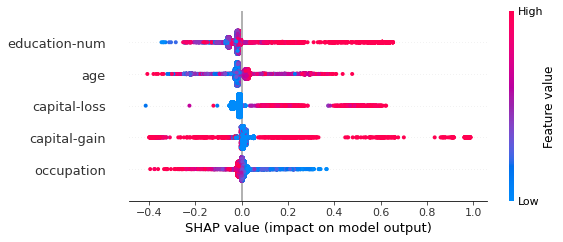

In [20]:
sp.summary_plot(shap_values)

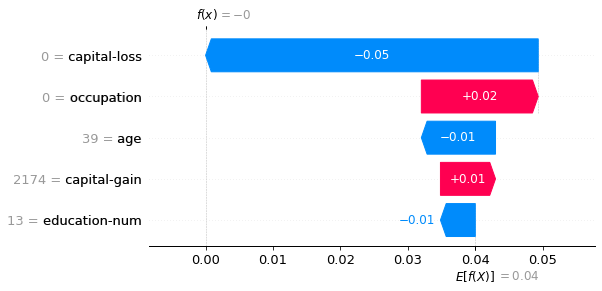

In [21]:
sp.plots.waterfall(shap_values[0])

In [22]:
# TAKES TOO LONG :(
#sp.initjs()
#sp.plots.force(shap_values)

### Info gathered

Captial gain has a HUGE weight when it comes to determining whether an individual makes <50K or not. This is not really practical though, and it seems to be that 2000 is the turning point for determining if they will make >50k or not. 

## Age, Sex, Occupation, Hours/Week

In [23]:
# create training sets
xs2 = adults[['age', 'hours/week', 'sex', 'occupation']][:28000]
xs2 = xs2.replace(
        [
                                                                 # map of each occupation ~> number
         'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', # 0, 1, 2
         'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', # 3, 4, 5, 6
         'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',# 7, 8, 9
         'Tech-support', '?', 'Protective-serv', 'Armed-Forces','Priv-house-serv'# 10, 11, 12, 13, 14
         ], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
)
xs2 = xs2.replace(['Male', 'Female'], [0,1])

ys2 = adults['income'][:28000]
ys2 = ys2.replace(['<=50K', '>50K'], [0,1])

# testing sets
testX2 = adults[['age', 'hours/week', 'sex', 'occupation']][28000:]
testX2 = testX2.replace(
        [
                                                                 # map of each occupation ~> number
         'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', # 0, 1, 2
         'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', # 3, 4, 5, 6
         'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',# 7, 8, 9
         'Tech-support', '?', 'Protective-serv', 'Armed-Forces','Priv-house-serv'# 10, 11, 12, 13, 14
         ], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
)
testX2 = testX2.replace(['Male', 'Female'], [0,1])

testY2 = adults['income'][28000:]
testY2 = testY2.replace(['<=50K', '>50K'], [0,1])

# train the nn
mlp2 = nn(max_iter=50000)

mlp2.fit(xs2, ys2)
explainer2 = sp.Explainer(mlp2.predict, xs2, feature_names=['age', 'hours/week', 'sex', 'occupation']) # pass in the predict method and the data to use
shap_values2 = explainer2(xs2)

Exact explainer: 28001it [01:36, 256.34it/s]                           


In [24]:
rand2 = [[35, 40, 0, 10]]
pred2 = mlp2.predict_proba(rand2)
print(f'The prediction of a 35 year old male\nthat works 40 hours/week in Tech-support\nis ~> {pred2}\nThis means that there is {round(pred2[0][0] * 100, 5)}% chance of making <=50K a year and a {round(pred2[0][1] * 100, 5)}% of making >50K a year.')

The prediction of a 35 year old male
that works 40 hours/week in Tech-support
is ~> [[0.68109258 0.31890742]]
This means that there is 68.10926% chance of making <=50K a year and a 31.89074% of making >50K a year.


X does not have valid feature names, but MLPClassifier was fitted with feature names


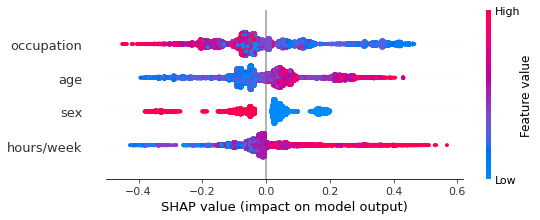

In [25]:
sp.summary_plot(shap_values2)

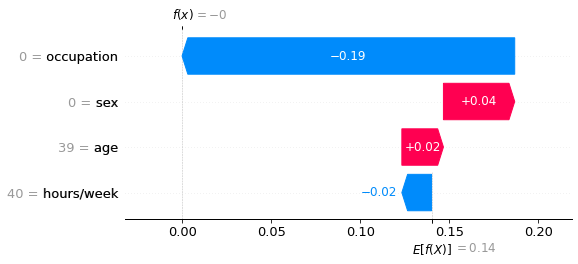

In [26]:
sp.plots.waterfall(shap_values2[0])

In [27]:
# TAKES TOO LONG :(
#sp.initjs()
#sp.plots.force(shap_values2)

## Info Gathered

Occupation this time has the largest factor in determining if an individual makes >50K a year or not. This makes sense because in the real work, occupation largely determines your yearly income moreso than capital gain or other factors.

# Pokemon Section

Let's see how good the neural net is a determining whether a pokemon is legendary or not, based off of its HP, Attack, & Total alone, and then using all of the stats as features.

In [61]:
# create sets
xs3 = pokemon[['HP', 'Attack', 'Total']][:700]

ys3 = pokemon['Legendary'][:700]
ys3 = ys3.replace(['N', 'Y'], [0,1])


testX3 = pokemon[['HP', 'Attack', 'Total']][700:]

#train the set
mlp3 = nn(max_iter=1000)

mlp3.fit(xs3, ys3)
explainer3 = sp.Explainer(mlp3.predict, xs3, feature_names=['HP', 'Attack', 'Total']) # pass in the predict method and the data to use
shap_values3 = explainer3(xs3)

In [62]:
# predict random values
pred3 = mlp3.predict(testX3)
print(pred3)
shap_values3[1]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


.values =
array([0., 0., 0.])

.base_values =
0.0

.data =
array([ 60,  62, 405])

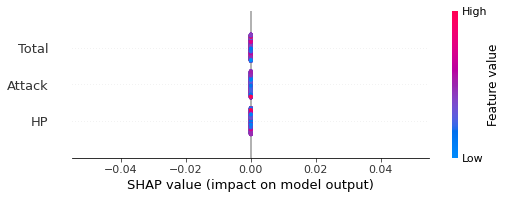

In [59]:
sp.summary_plot(shap_values3)

In [63]:
#sp.plots.waterfall(shap_values3[1]) # is mad at me

## Info Gathered

Apparently the information I am feeding the NN is not enough because It won't predict any other value besides NO. So I will test all the values now to see if anything changes

# All Stats Section

In [65]:
# create sets
xs4 = pokemon[['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total']][:700]

ys4 = pokemon['Legendary'][:700]
ys4 = ys4.replace(['N', 'Y'], [0,1])


testX4 = pokemon[['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total']][700:]

#train the set
mlp4 = nn(max_iter=1000)

mlp4.fit(xs4, ys4)
explainer4 = sp.Explainer(mlp4.predict, xs4, feature_names=['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Total']) # pass in the predict method and the data to use
shap_values4 = explainer4(xs4)

In [79]:
#predict 1 value
rand4 = [[100, 100, 100, 100, 100, 100, 600]]
pred4 = mlp4.predict_proba(rand4)
print(f'The prediction of a pokemon with 100 in all stats and 600 Total\nis ~> {pred4}\nThis means that there is {round(pred4[0][0] * 100, 5)}% chance of not being Legendary and a {round(pred4[0][1] * 100, 5)}% chance of being Legendary.')

The prediction of a pokemon with 100 in all stats and 600 Total
is ~> [[0.48485273 0.51514727]]
This means that there is 48.48527% chance of not being Legendary and a 51.51473% chance of being Legendary.


X does not have valid feature names, but MLPClassifier was fitted with feature names


In [80]:
# predict random values
pred4 = mlp4.predict(testX4)
print(pred4)
shap_values4[100]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


.values =
array([ 0.01795238,  0.00128571,  0.00645238, -0.01704762,  0.00078571,
       -0.00471429, -0.01471429])

.base_values =
0.01

.data =
array([ 50,  85,  55,  65,  65,  90, 410])

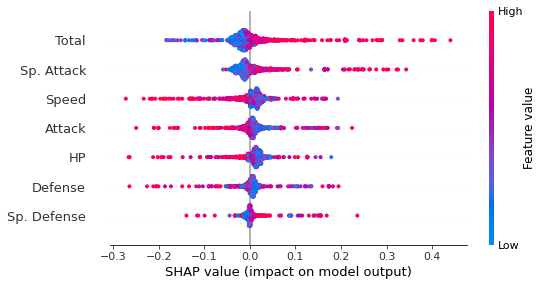

In [72]:
sp.summary_plot(shap_values4)

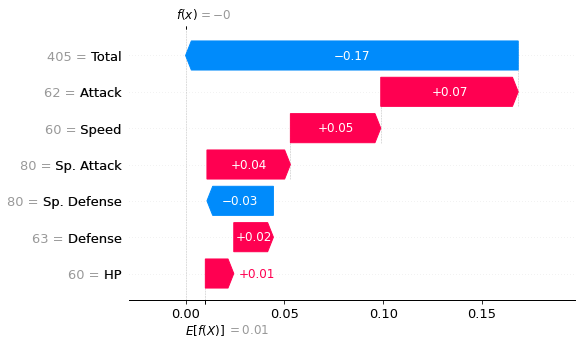

In [74]:
sp.plots.waterfall(shap_values4[1]) 

In [76]:
sp.initjs()
sp.plots.force(shap_values4)

## Info Gathered

The pokemon dataset coroporates when you feed the NN ALL the stats of certain pokemon. This is encouraging and suggests that HP, Attack, and Total alone could not predict Legend status or not. Total has the highest influence on the data which is to be expected, but the other featuers have significant weight as well. All except for HP, which seems to not really matter too much.